In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import torch
import pytorch_lightning as pl
import matplotlib.pyplot as plt
from zoobot.pytorch.training import finetune, representations

In [5]:
representations.ZoobotEncoder('hf_hub:mwalmsley/zoobot-encoder-convnext_nano')

ZoobotEncoder()

In [5]:
checkpoint_loc = 'data/example/model/binary_ring_resnet_greyscale.ckpt'
encoder_loc = 'data/example/model/resnet50_greyscale_224px.ckpt'

In [6]:
finetune.FinetuneableZoobotClassifier.load_from_checkpoint(checkpoint_loc, checkpoint_loc=encoder_loc)

Lightning automatically upgraded your loaded checkpoint from v1.9.4 to v2.1.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint data/example/model/resnet50_greyscale_224px.ckpt`


FinetuneableZoobotClassifier(
  (encoder): ResNet(
    (conv1): Conv2d(1, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d

In [2]:
import pandas as pd

friendly = pd.read_parquet('/home/walml/repos/zoobot-predictions/data/example/predictions/predictions_debug_friendly.parquet')
friendly

,id_str,hdf5_loc,ring_yes_fraction,ring_no_fraction
0,102960_1416,grouped_across_models.hdf5,0.406874,0.593126
1,103172_361,grouped_across_models.hdf5,0.369794,0.630206
2,105322_1364,grouped_across_models.hdf5,0.445615,0.554385
3,111496_375,grouped_across_models.hdf5,0.389134,0.610866
4,112858_2969,grouped_across_models.hdf5,0.442991,0.557009
...,...,...,...,...
795,86788_4069,grouped_across_models.hdf5,0.375464,0.624536
796,88865_2781,grouped_across_models.hdf5,0.388151,0.611849
797,93978_5338,grouped_across_models.hdf5,0.396344,0.603656
798,94685_2305,grouped_across_models.hdf5,0.421905,0.578095


In [3]:
advanced = pd.read_parquet('/home/walml/repos/zoobot-predictions/data/example/predictions/predictions_debug_advanced.parquet')
advanced

,id_str,hdf5_loc,ring_yes_fraction,ring_no_fraction,ring_yes_90pc-lower,ring_no_90pc-lower,ring_yes_90pc-upper,ring_no_90pc-upper,ring_yes_proportion-asked,ring_no_proportion-asked
0,102960_1416,grouped_across_models.hdf5,0.406874,0.593126,0.356016,0.493385,0.506615,0.643984,1.0,1.0
1,103172_361,grouped_across_models.hdf5,0.369794,0.630206,0.226994,0.253482,0.746518,0.773006,1.0,1.0
2,105322_1364,grouped_across_models.hdf5,0.445615,0.554385,0.402339,0.531634,0.468366,0.597661,1.0,1.0
3,111496_375,grouped_across_models.hdf5,0.389134,0.610866,0.303729,0.302106,0.697894,0.696271,1.0,1.0
4,112858_2969,grouped_across_models.hdf5,0.442991,0.557009,0.403157,0.534587,0.465413,0.596843,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
795,86788_4069,grouped_across_models.hdf5,0.375464,0.624536,0.277983,0.288381,0.711619,0.722017,1.0,1.0
796,88865_2781,grouped_across_models.hdf5,0.388151,0.611849,0.294091,0.279322,0.720678,0.705909,1.0,1.0
797,93978_5338,grouped_across_models.hdf5,0.396344,0.603656,0.335530,0.531768,0.468231,0.664470,1.0,1.0
798,94685_2305,grouped_across_models.hdf5,0.421905,0.578095,0.292338,0.208365,0.791635,0.707662,1.0,1.0


<Axes: >

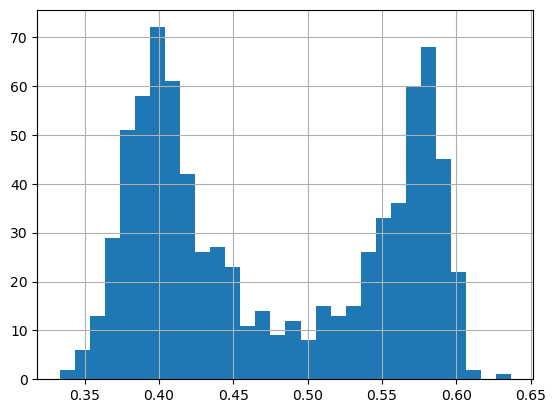

In [5]:
friendly['ring_yes_fraction'].hist(bins=30)

In [8]:
labels = pd.read_parquet('/home/walml/repos/decals-rings/data/aggregation/latest_volunteer_aggregation.parquet')
labels.columns.values

array(['dr8_id', 'uploaded_at', 'ring_yes', 'ring_no', 'ring_total',
       'ring_yes_fraction', 'ring_no_fraction', 'jpg_loc', 'file_loc'],
      dtype=object)

In [12]:
advanced['dr8_id'] = advanced['id_str']

In [15]:
df = pd.merge(advanced, labels, how='inner', on='dr8_id', suffixes=('_pred', ''))

In [16]:
df

,id_str,hdf5_loc,ring_yes_fraction_pred,ring_no_fraction_pred,ring_yes_90pc-lower,ring_no_90pc-lower,ring_yes_90pc-upper,ring_no_90pc-upper,ring_yes_proportion-asked,ring_no_proportion-asked,dr8_id,uploaded_at,ring_yes,ring_no,ring_total,ring_yes_fraction,ring_no_fraction,jpg_loc,file_loc
0,102960_1416,grouped_across_models.hdf5,0.406874,0.593126,0.356016,0.493385,0.506615,0.643984,1.0,1.0,102960_1416,2022-02-18 19:14:36+00:00,5,6,11,0.454545,0.545455,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/10...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/10...
1,103172_361,grouped_across_models.hdf5,0.369794,0.630206,0.226994,0.253482,0.746518,0.773006,1.0,1.0,103172_361,2022-02-19 10:18:38+00:00,8,1,10,0.800000,0.200000,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/10...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/10...
2,105322_1364,grouped_across_models.hdf5,0.445615,0.554385,0.402339,0.531634,0.468366,0.597661,1.0,1.0,105322_1364,2022-02-18 19:46:10+00:00,8,4,12,0.666667,0.333333,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/10...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/10...
3,111496_375,grouped_across_models.hdf5,0.389134,0.610866,0.303729,0.302106,0.697894,0.696271,1.0,1.0,111496_375,2022-02-19 00:47:30+00:00,6,4,10,0.600000,0.400000,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/11...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/11...
4,112858_2969,grouped_across_models.hdf5,0.442991,0.557009,0.403157,0.534587,0.465413,0.596843,1.0,1.0,112858_2969,2022-02-19 01:27:55+00:00,10,1,11,0.909091,0.090909,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/11...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/11...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,86788_4069,grouped_across_models.hdf5,0.375464,0.624536,0.277983,0.288381,0.711619,0.722017,1.0,1.0,86788_4069,2022-02-19 04:40:52+00:00,5,5,10,0.500000,0.500000,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/86...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/86...
796,88865_2781,grouped_across_models.hdf5,0.388151,0.611849,0.294091,0.279322,0.720678,0.705909,1.0,1.0,88865_2781,2022-02-19 02:17:11+00:00,7,3,10,0.700000,0.300000,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/88...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/88...
797,93978_5338,grouped_across_models.hdf5,0.396344,0.603656,0.335530,0.531768,0.468231,0.664470,1.0,1.0,93978_5338,2022-02-18 20:48:09+00:00,10,5,15,0.666667,0.333333,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/93...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/93...
798,94685_2305,grouped_across_models.hdf5,0.421905,0.578095,0.292338,0.208365,0.791635,0.707662,1.0,1.0,94685_2305,2022-02-19 02:34:04+00:00,8,3,11,0.727273,0.272727,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/94...,/share/nas2/walml/galaxy_zoo/decals/dr8/jpg/94...


In [18]:
df[['ring_yes_fraction', 'ring_yes_fraction_pred']]

,ring_yes_fraction,ring_yes_fraction_pred
0,0.454545,0.406874
1,0.800000,0.369794
2,0.666667,0.445615
3,0.600000,0.389134
4,0.909091,0.442991
...,...,...
795,0.500000,0.375464
796,0.700000,0.388151
797,0.666667,0.396344
798,0.727273,0.421905


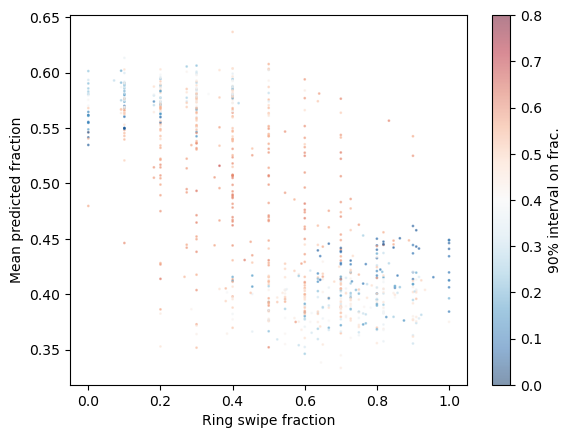

In [33]:
plt.scatter(df['ring_yes_fraction'], df['ring_yes_fraction_pred'], s=1., alpha=.5, c=df['ring_no_90pc-upper'] - df['ring_no_90pc-lower'],
             cmap='RdBu_r', vmin=0., vmax=.8)
plt.xlabel('Ring swipe fraction')
plt.ylabel('Mean predicted fraction')
plt.colorbar(label=r'90% interval on frac.')